# Simple Moving Average (SMA)

The [SMA filter](https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average) can be used for removing noise from a data set and producing a smooth curve, for example.

### Import the required stuff

In [1]:
# plot the figures at the notebook
%matplotlib inline

import numpy as np

import my_functions as mf

### Create a dataset

In [2]:
# number of data
ndata = 200

In [3]:
# coordinates
x = np.linspace(0., 2*np.pi, ndata)

# noise-free data
data = 0.4*np.sin(x) + 0.5*np.cos(3*x)

# noisy data
data_noisy = data + np.random.normal(loc=0., scale=0.1, size=ndata)

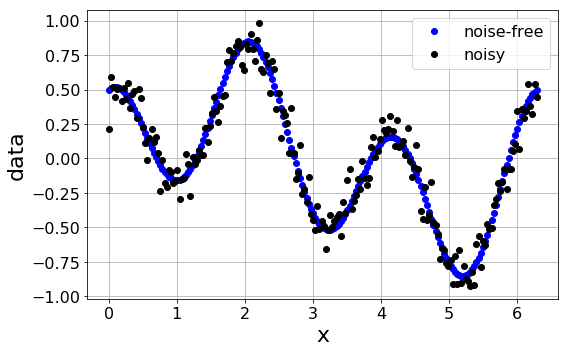

In [4]:
mf.plot(x=x, y=data, z=data_noisy, labely='noise-free', labelz='noisy')

In [8]:
mf.plot?

### SMA filter

In [5]:
# window size
window_size = 5

In [6]:
filtered_data = mf.sma1d(data_noisy, window_size)

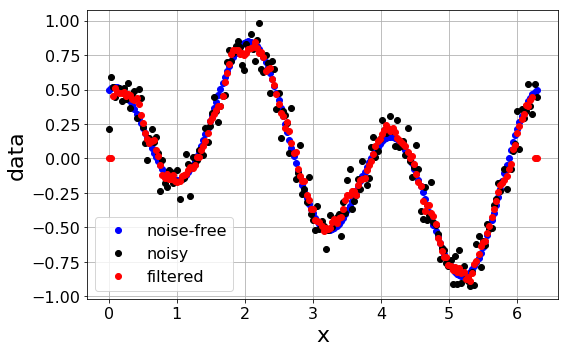

In [7]:
mf.plot(x=x, y=data, z=data_noisy, w=filtered_data,
        labely='noise-free', labelz='noisy', labelw='filtered')

### Testing

In [9]:
coordinates = np.arange(15)
specific_input = np.ones(15)

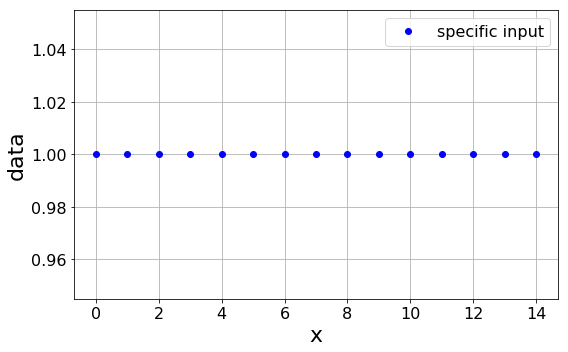

In [10]:
mf.plot(x=coordinates, y=specific_input, labely='specific input')

In [11]:
# True output for a window size 5
output_true = np.ones_like(specific_input)
output_true[0:2:1] = 0
output_true[-1:-3:-1] = 0

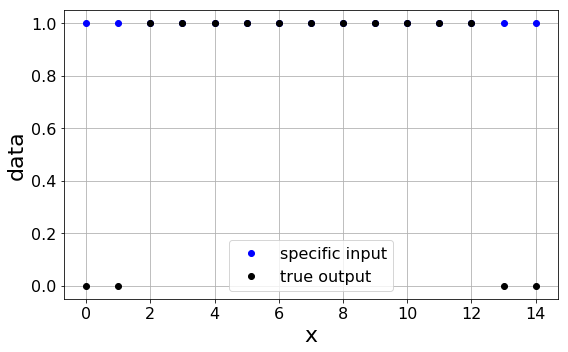

In [12]:
mf.plot(x=coordinates, y=specific_input, z=output_true, labely='specific input', labelz='true output')

In [13]:
output_calculated = mf.sma1d(specific_input, 5)

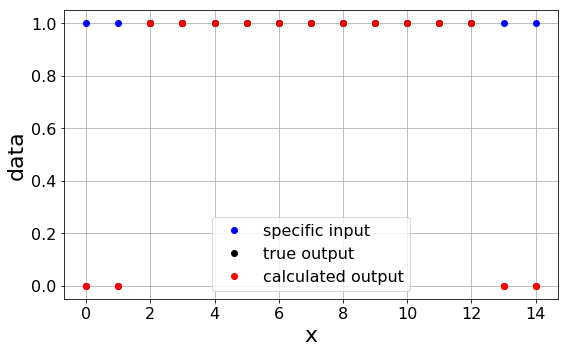

In [14]:
mf.plot(x=coordinates, y=specific_input, z=output_true, w=output_calculated,
        labely='specific input', labelz='true output', labelw='calculated output')

In [15]:
output_calculated

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.])

In [19]:
output_calculated[-1] = 9

In [16]:
output_true

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.])

In [17]:
from numpy.testing import assert_almost_equal

In [20]:
assert_almost_equal(output_calculated, output_true, decimal=15)

AssertionError: 
Arrays are not almost equal to 15 decimals

Mismatch: 6.67%
Max absolute difference: 9.
Max relative difference: nan
 x: array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 9.])
 y: array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.])

In [21]:
output_calculated[5:8] -= 0.2

In [22]:
output_calculated

array([0. , 0. , 1. , 1. , 1. , 0.8, 0.8, 0.8, 1. , 1. , 1. , 1. , 1. ,
       0. , 9. ])

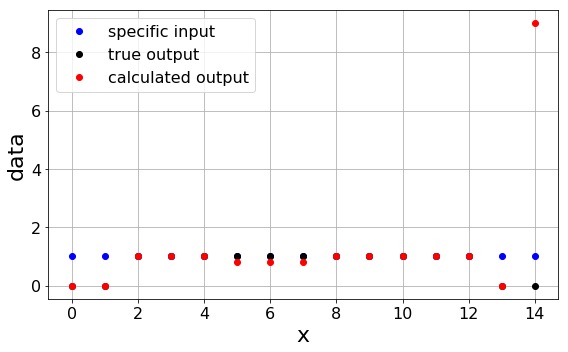

In [23]:
mf.plot(x=coordinates, y=specific_input, z=output_true, w=output_calculated,
        labely='specific input', labelz='true output', labelw='calculated output')

In [24]:
assert_almost_equal(output_calculated, output_true, decimal=15)

AssertionError: 
Arrays are not almost equal to 15 decimals

Mismatch: 26.7%
Max absolute difference: 9.
Max relative difference: nan
 x: array([0. , 0. , 1. , 1. , 1. , 0.8, 0.8, 0.8, 1. , 1. , 1. , 1. , 1. ,
       0. , 9. ])
 y: array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.])

These are simple tests to validate our code. In complex situations, however, we are not able to use tests like these. In such situations, we may use automated tests. Here, we run automated tests with [pytest](https://docs.pytest.org/en/latest/index.html). Take a look at the file `test_sma.py`. It contains three automated tests. In a directory containing both the files `my_funtions.py` and `test_sma.py`, execute the command `python -m pytest test_sma.py` in a Windows cmd, or Linux terminal, or Git Bash.

In [25]:
data_test = np.arange(5)
window = 6

In [26]:
mf.sma1d(data_test, window)

AssertionError: data must have more elements than window_size